In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
hbar = 1.055e-34      # J.s
m = 9.109e-31         # kg
a = 1e-10             # m (constante de rede)
eV = 1.6e-19          # J

# Parâmetros
U0 = 1.0 * eV         # Potencial periódico (1 eV)
G = 2 * np.pi / a     # Vetor recíproco
k = np.linspace(-1.5*G, 1.5*G, 1000)

# Energia livre
E_free = (hbar**2 * k**2) / (2 * m)

In [2]:
# Correção de potencial (gap na borda da zona de Brillouin)
E_plus = []
E_minus = []

for ki in k:
    # Estados acoplados k e k-G
    E1 = (hbar**2 * ki**2)/(2*m)
    E2 = (hbar**2*(ki-G)**2)/(2*m)

    # Matriz 2x2 do modelo quase livre:
    H = np.array([[E1, U0/2],
                  [U0/2, E2]])
    # Autovalores = energias corrigidas
    eigvals = np.linalg.eigvalsh(H)
    E_minus.append(eigvals[0])
    E_plus.append(eigvals[1])



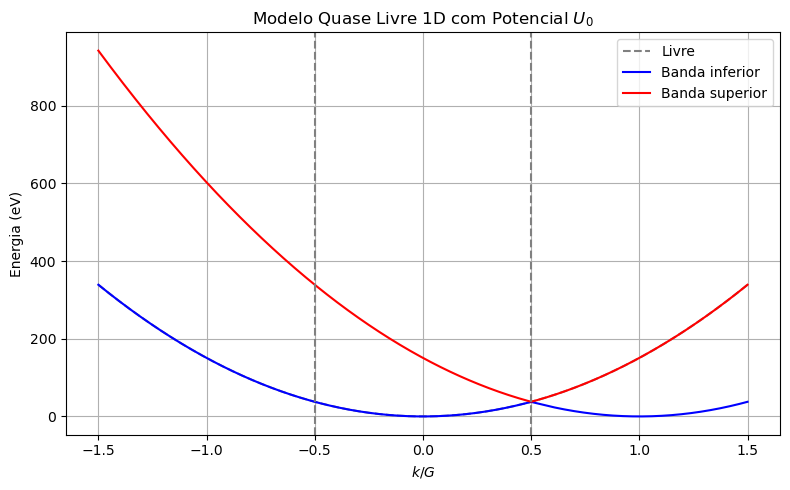

In [3]:
# Plotagem
plt.figure(figsize=(8,5))
plt.plot(k/G, np.array(E_free)/eV, '--', color='gray', label='Livre')
plt.plot(k/G, np.array(E_minus)/eV, 'b', label='Banda inferior')
plt.plot(k/G, np.array(E_plus)/eV, 'r', label='Banda superior')
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.axvline(x=-0.5, color='gray', linestyle='--')
plt.title('Modelo Quase Livre 1D com Potencial $U_0$')
plt.xlabel(r'$k/G$')
plt.ylabel('Energia (eV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


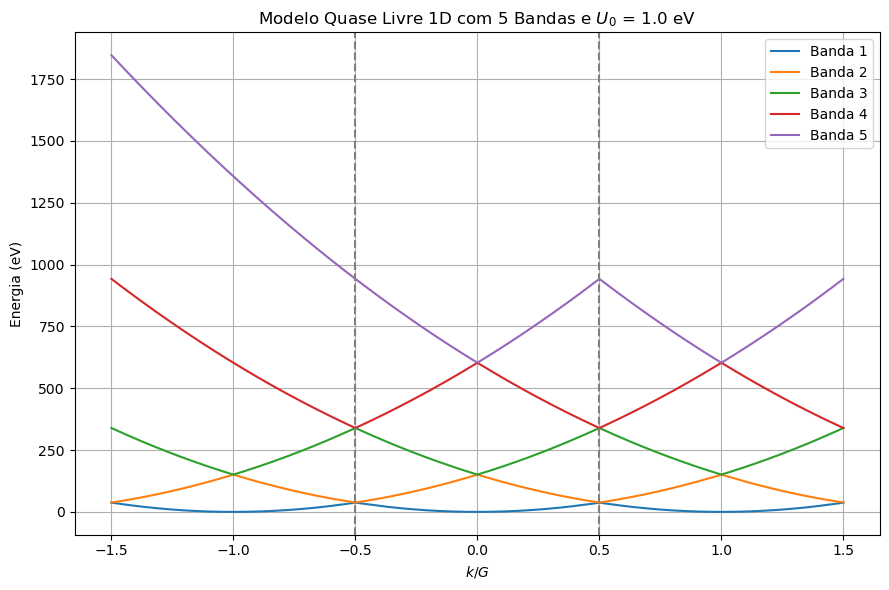

In [5]:
# Com muitas bandas (NxN)

# Constantes físicas
hbar = 1.055e-34      # J.s
m = 9.109e-31         # kg
a = 1e-10             # m (constante de rede)
eV = 1.6e-19          # J

# Parâmetros do modelo
U0 = 1.0*eV         # Potencial periódico (1 eV)
G = 2*np.pi/a     # Vetor recíproco
N = 5                 # Tamanho da matriz (número de harmônicos de G)
k_vals = np.linspace(-1.5*G, 1.5*G, 500)

# Construção das bandas
bands = [[] for _ in range(N)]

for k in k_vals:
    # Índices de vetores G: de -n a +n
    indices = np.arange(-N//2, N//2 + 1)
    size = len(indices)
    
    # Montar matriz Hamiltoniana NxN
    H = np.zeros((size, size))
    for i, ni in enumerate(indices):
        for j, nj in enumerate(indices):
            if i == j:
                # Energia cinética deslocada por G
                q = k + ni * G
                H[i, j] = (hbar**2 * q**2) / (2 * m)
            elif abs(ni - nj) == 1:
                H[i, j] = U0 / 2  # Acoplamento de primeira ordem
            elif abs(ni - nj) == 2:
                H[i, j] = U0 / 4  # Acoplamento de segunda ordem (mais fraco)
            # Para ordens maiores: continue com U0/8, U0/16, etc. se quiser

    # Resolver autovalores (energias)
    eigvals = np.linalg.eigvalsh(H)
    # Ordenar por banda
    for n in range(N):
        bands[n].append(eigvals[n])

# Plot
plt.figure(figsize=(9,6))
for n in range(N):
    plt.plot(k_vals/G, np.array(bands[n])/eV, label=f'Banda {n+1}')
plt.axvline(x=-0.5, color='gray', linestyle='--')
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.title(f'Modelo Quase Livre 1D com {N} Bandas e $U_0$ = {U0/eV:.1f} eV')
plt.xlabel(r'$k/G$')
plt.ylabel('Energia (eV)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
